# Введение в искусственные нейронные сети
# Урок 2. Keras

## Простая нейросеть на Keras

In [1]:
# The full neural network code!
###############################
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

from tensorflow.keras import regularizers


In [2]:

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [3]:

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


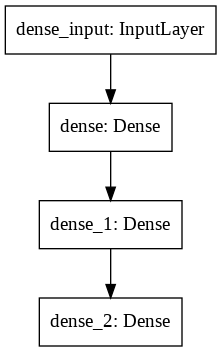

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [6]:

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/10
938/938 [==============================] - 2s 3ms/step - loss: 0.5024 - accuracy: 0.8194
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3749 - accuracy: 0.8637
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3383 - accuracy: 0.8760
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3139 - accuracy: 0.8858
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2971 - accuracy: 0.8927
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2811 - accuracy: 0.8966
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2705 - accuracy: 0.9000
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2596 - accuracy: 0.9050
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2453 - accuracy: 0.9104
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8809

In [7]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')


In [8]:
# Evaluate the model.
loss, accuracy = model.evaluate(test_images, to_categorical(test_labels))
print(f'Точность = {accuracy * 100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8809
Точность = 88.09%


точность значительно ниже "школьного датасета", но вполне приемлимая